## Análisis exploratorio de los datos disponibles sobre *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [46]:
df = pd.read_csv('Data/Madrid/listings0.csv.gz',compression='gzip',low_memory=False)

In [47]:
#vemos la estructura de los datos 
df.shape

(17358, 106)

In [48]:
#Todas las columnas están en minúsculas y no hay espacios
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190206175658,2019-02-06,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",NaN,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,Madrid,"Madrid, Spain",ES,Spain,40.456283,-3.677625,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,30,1,1,30,30,1.0,30.0,5 days ago,t,30,53,83,83,2019-02-06,60,1,2010-03-14,2019-01-18,98.0,10.0,10.0,9.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.55
1,21853,https://www.airbnb.com/rooms/21853,20190206175658,2019-02-06,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"

In [73]:
#Comprobamos chequeando la URL que significa cada columna y eliminamos las son solo de consulta, 
#campos de texto sin relevancia, variables redundantes e información irrelevante o no fiable.
a_borrar

f    17029
t      329
Name: require_guest_phone_verification, dtype: int64

In [6]:
#Pasamos a formato fecha la fecha en la que se hace scraping, ya que nos será útil luego
df['scrape_id'] = df.scrape_id.astype("object")
df['scrape_id'] = pd.to_datetime(df['scrape_id'],format="%Y%m%d%H%M%S")
#Comprobamos que el resultado está bien
df.scrape_id[0:4]

0   2019-02-06 17:56:58
1   2019-02-06 17:56:58
2   2019-02-06 17:56:58
3   2019-02-06 17:56:58
Name: scrape_id, dtype: datetime64[ns]

In [7]:
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

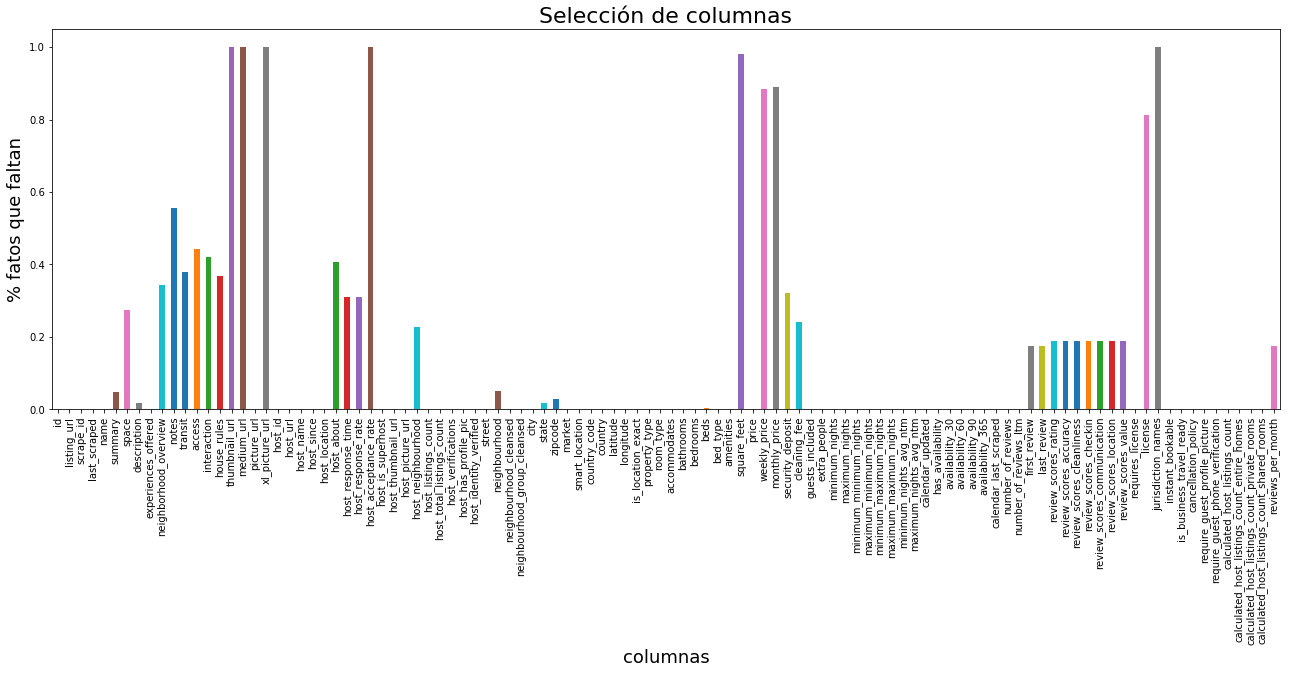

In [8]:
#El siguiente paso es realizar una selección de las columnas que aportan valor al análisis, 

missing = df.isnull().sum()/df.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [9]:
#El primer criterio elegido para reducir el número de columnas es que contenga muchos nulos
missing.loc[missing > 0.3]


neighborhood_overview    0.342839
notes                    0.554499
transit                  0.379998
access                   0.442505
interaction              0.419979
house_rules              0.367842
thumbnail_url            1.000000
medium_url               1.000000
xl_picture_url           1.000000
host_about               0.405980
host_response_time       0.308849
host_response_rate       0.308849
host_acceptance_rate     1.000000
square_feet              0.981046
weekly_price             0.883224
monthly_price            0.889503
security_deposit         0.320890
license                  0.812421
jurisdiction_names       1.000000
dtype: float64

In [10]:
#El primer paso es quitar las columnas de las cuales no entendemos el significado o tiene información redundante
a_borrar = ['neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url'
           ,'medium_url','xl_picture_url','host_about','host_response_time','host_response_rate','host_acceptance_rate'
           ,'square_feet','weekly_price','monthly_price','security_deposit','license','jurisdiction_names']
df.drop(a_borrar,axis=1,inplace=True)


In [11]:
#Hemos pasado de 106 columnas a 87
df.shape

(17358, 87)

In [12]:
#Desglosamos las columnas por tipo
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17358 entries, 0 to 17357
Data columns (total 87 columns):
id                                              17358 non-null int64
listing_url                                     17358 non-null object
scrape_id                                       17358 non-null datetime64[ns]
last_scraped                                    17358 non-null object
name                                            17353 non-null object
summary                                         16546 non-null object
space                                           12581 non-null object
description                                     17042 non-null object
experiences_offered                             17358 non-null object
picture_url                                     17358 non-null object
host_id                                         17358 non-null int64
host_url                                        17358 non-null object
host_name                                    

In [13]:
#Separamos las columnas por el tipo en el que vienen dados, valoramos su utilidad y comprobamos que sea correcto
integers = df.columns[df.dtypes == 'int64']
df[integers].tail()

,id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
17353,32176448,241419817,2,1,2,1125,2,2,1125,1125,26,56,86,266,0,0,1,1,0,0
17354,32179274,240020024,6,1,2,1125,2,2,1125,1125,22,52,82,172,0,0,1,1,0,0
17355,32180052,38568619,2,1,2,1125,2,2,1125,1125,19,49,79,79,0,0,2,1,1,0
17356,32180334,38568619,2,1,2,1125,2,2,1125,1125,1,9,12,39,0,0,2,1,1,0
17357,32181777,61040597,2,1,1,1125,1,1,1125,1125,22,50,80,355,0,0,7,0,7,0


In [14]:
categoricas = df.columns[df.dtypes == 'object']
df[categoricas].head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,picture_url,host_url,host_name,...,calendar_updated,has_availability,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/6369,2019-02-06,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,https://a0.muscache.com/im/pictures/683224/4cc...,https://www.airbnb.com/users/show/13660,Simon,...,5 days ago,t,2010-03-14,2019-01-18,t,f,f,flexible,f,f
1,https://www.airbnb.com/rooms/21853,2019-02-06,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,https://a0.muscache.com/im/pictures/68483181/8...,https://www.airbnb.com/users/show/83531,Abdel,...,4 weeks ago,t,2014-10-10,2018-07-15,t,f,f,strict_14_with_grace_period,f,f
2,https://www.airbnb.com/rooms/24836,2019-02-06,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,https://a0.muscache.com/im/pictures/573005/a2c...,https://www.airbnb.com/users/show/101653,Tenty,...,2 weeks ago,t,2011-06-02,2019-01-04,t,f,f,moderate,f,f
3,https://www.airbnb.com/rooms/26823,2019-02-06,Roon for two people,NaN,Room for two person with dressing room and bat...,Room for two person with dressing room and bat...,none,https://a0.muscache.com/im/pictures/167976/3c5...,https://www.airbnb.com/users/show/114340,Agustina,...,3 months ago,t,2010-09-28,2018-11-25,t,f,f,flexible,f,f
4,https://www.airbnb.com/rooms/26825,2019-02-06,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,none,https://a0.muscache.com/im/pictures/149358/218...,https://www.airbnb.com/users/show/114340,Agustina,...,2 months ago,t,2010-05-10,2019-02-01,t,f,f,strict_14_with_grace_period,f,f


In [15]:
#Importamos este código para poder ver todas las columnas
from IPython.display import display


pd.options.display.max_columns = None


In [16]:
df.guests_included.value_counts()

1     10179
2      4590
4      1342
3       590
6       299
5       174
8        66
7        62
10       29
16        8
15        7
12        5
9         3
14        2
13        2
Name: guests_included, dtype: int64

In [17]:
df[df.host_listings_count > 50]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
149,397778,https://www.airbnb.com/rooms/397778,2019-02-06 17:56:58,2019-02-06,PUERTA DEL SOL VI - MADRID CENTRE,NaN,Location and access This apartment is located ...,Location and access This apartment is located ...,none,https://a0.muscache.com/im/pictures/40372595/2...,1408525,https://www.airbnb.com/users/show/1408525,Mad4Rent,2011-11-15,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/1408525/profi...,https://a0.muscache.com/im/users/1408525/profi...,Sol,57.0,57.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Madrid, Madrid, Spain",Sol,Sol,Centro,Madrid,Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.414565,-3.704374,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$77.00,$33.00,2,$11.00,3,365,2,3,365,365,3.0,365.0,today,t,12,38,64,321,2019-02-06,28,8,2013-04-28,2018-09-24,84.0,9.0,8.0,9.0,9.0,10.0,8.0,t,t,f,flexible,f,t,57,57,0,0,0.40
151,399140,https://www.airbnb.com/rooms/399140,2019-02-06 17:56:58,2019-02-06,ATOCHA II - MADRID CITY CENTRE,NaN,This studio apartment is located in a newly-co...,This studio apartment is located in a newly-co...,none,https://a0.muscache.com/im/pictures/11290520/c...,1408525,https://www.airbnb.com/users/show/1408525,Mad4Rent,2011-11-15,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/1408525/profi...,https://a0.muscache.com/im/users/1408525/profi...,Sol,57.0,57.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Madrid, Madrid, Spain",Palos do Moguer,Palos de Moguer,Arganzuela,Madrid,Madrid,28045,Madrid,"Madrid, Spain",ES,Spain,40.406423,-3.695096,t,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",$66.00,$33.00,2,$11.00,3,365,2,3,365,365,3.0,365.0,today,t,3,3,26,297,2019-02-06,25,8,2012-12-09,2019-01-20,85.0,9.0,9.0,10.0,9.0,10.0,8.0,t,t,f,moderate,f,t,57,57,0,0,0.33
154,402588,https://www.airbnb.com/rooms/402588,2019-02-06 17:56:58,2019-02-06,PUERTA DEL SOL l - MADRID CENTRE,NaN,Lovely attic located in a quiet pedestrian str...,Lovely attic located in a quiet pedestrian str...,none,https://a0.muscache.com/im/pictures/40370968/6...,1408525,https://www.airbnb.com/users/show/1408525,Mad4Rent,2011-11-15,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/1408525/profi...,https://a0.muscache.com/im/users/1408525/profi...,Sol,57.0,57.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Madrid, Madrid, Spain",Sol,Sol,Centro,Madrid,Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415963,-3.7030

In [18]:
#comprobamos que host_listings_counts y host_total_listings_count
son_iguales=df.host_listings_count == df.host_total_listings_count
son_iguales.value_counts()

True     17354
False        4
dtype: int64

In [19]:
son_iguales=df.calculated_host_listings_count == df.host_listings_count
son_iguales.value_counts()

True     13871
False     3487
dtype: int64

In [20]:
#Comprobamos accediendo a la URL comprobamos que significan las columnas host_listings_count y calculated_host_listings_count
prueba = df[son_iguales == False][0:5]
prueba[['host_url','host_listings_count','calculated_host_listings_count','room_type','calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']]

,host_url,host_listings_count,calculated_host_listings_count,room_type,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
20,https://www.airbnb.com/users/show/401552,2.0,1,Entire home/apt,1,0,0
33,https://www.airbnb.com/users/show/361930,6.0,4,Entire home/apt,4,0,0
35,https://www.airbnb.com/users/show/361930,6.0,4,Entire home/apt,4,0,0
46,https://www.airbnb.com/users/show/723539,10.0,9,Entire home/apt,9,0,0
47,https://www.airbnb.com/users/show/740087,9.0,8,Entire home/apt,8,0,0


In [21]:
df.room_type.value_counts(dropna=False)

Entire home/apt    11198
Private room        5936
Shared room          224
Name: room_type, dtype: int64

In [22]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_night

In [23]:
#Borramos las categóricas que no son relevantes por aportar texto no analizable o sin valor para el análisis.
a_borrar_3 = ['name','summary','space','description','experiences_offered',
            'host_thumbnail_url','picture_url',
             'market']
df.drop(a_borrar_3,axis=1,inplace=True)


In [24]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availa

In [25]:
#Comprobamos si hay valores nulos sin formatear 
df.is_location_exact.value_counts()


t    11794
f     5564
Name: is_location_exact, dtype: int64

In [26]:
df[df.host_id == 38568619]

,id,listing_url,scrape_id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
17355,32180052,https://www.airbnb.com/rooms/32180052,2019-02-06 17:56:58,2019-02-06,38568619,https://www.airbnb.com/users/show/38568619,Cosima,2015-07-15,"Bogotá, Bogota, Colombia",f,https://a0.muscache.com/im/users/38568619/prof...,Malasaña,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Madrid, Comunidad de Madrid, Spain",Malasaña,Universidad,Centro,Madrid,Comunidad de Madrid,28004,"Madrid, Spain",ES,Spain,40.423132,-3.701503,t,Loft,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",$65.00,NaN,1,$0.00,2,1125,2,2,1125,1125,2.0,1125.0,today,t,19,49,79,79,2019-02-06,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,2,1,1,0,NaN
17356,32180334,https://www.airbnb.com/rooms/32180334,2019-02-06 17:56:58,2019-02-06,38568619,https://www.airbnb.com/users/show/38568619,Cosima,2015-07-15,"Bogotá, Bogota, Colombia",f,https://a0.muscache.com/im/users/38568619/prof...,Malasaña,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Madrid, Comunidad de Madrid, Spain",Malasaña,Universidad,Centro,Madrid,Comunidad de Madrid,28004,"Madrid, Spain",ES,Spain,40.423354,-3.702058,t,Loft,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",$100.00,NaN,1,$0.00,2,1125,2,2,1125,1125,2.0,1125.0,today,t,1,9,12,39,2019-02-06,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,2,1,1,0,NaN


In [27]:
df.shape

(17358, 79)

In [28]:
floats = df.columns[df.dtypes == 'float64']
df[floats].head()

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,1.0,40.456283,-3.677625,1.0,1.0,0.0,1.0,30.0,98.0,10.0,10.0,9.0,10.0,9.0,10.0,0.55
1,2.0,2.0,40.403410,-3.740842,1.0,1.0,1.0,4.0,40.0,92.0,9.0,9.0,10.0,10.0,8.0,9.0,0.63
2,1.0,1.0,40.419951,-3.697637,1.0,2.0,3.0,3.0,1125.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.56
3,2.0,2.0,40.391161,-3.688234,1.0,1.0,1.0,2.0,1125.0,88.0,10.0,10.0,10.0,9.0,9.0,9.0,0.28
4,2.0,2.0,40.389850,-3.690108,1.0,1.0,1.0,2.0,365.0,94.0,10.0,10.0,10.0,9.0,9.0,10.0,1.16


In [29]:
#comprobamos que las columnas referidas al número de propiedades que tiene un host deberían ser integers.
df.host_total_listings_count.value_counts()



1.0      6983
2.0      2503
3.0      1312
4.0       805
5.0       580
6.0       505
7.0       356
8.0       316
9.0       313
11.0      234
493.0     210
10.0      206
22.0      190
19.0      155
16.0      135
12.0      127
20.0      113
105.0     108
99.0      101
51.0       97
15.0       92
21.0       92
106.0      89
85.0       86
29.0       84
14.0       78
17.0       78
13.0       77
39.0       75
53.0       75
         ... 
28.0       64
42.0       59
57.0       57
54.0       52
26.0       51
18.0       49
23.0       47
56.0       45
48.0       44
52.0       43
31.0       42
49.0       38
36.0       36
32.0       32
67.0       31
30.0       31
38.0       30
34.0       29
46.0       26
25.0       22
47.0       20
59.0       17
124.0      14
0.0         8
35.0        6
523.0       4
27.0        2
181.0       1
83.0        1
78.0        1
Name: host_total_listings_count, Length: 64, dtype: int64

In [30]:
df.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,2019-02-06 17:56:58,2019-02-06,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",NaN,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,"Madrid, Spain",ES,Spain,40.456283,-3.677625,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",$70.00,$5.00,2,$15.00,1,30,1,1,30,30,1.0,30.0,5 days ago,t,30,53,83,83,2019-02-06,60,1,2010-03-14,2019-01-18,98.0,10.0,10.0,9.0,10.0,9.0,10.0,t,f,f,flexible,f,f,1,0,1,0,0.55
1,21853,https://www.airbnb.com/rooms/21853,2019-02-06 17:56:58,2019-02-06,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Madrid, Madrid, Spain",Aluche,Cármenes,Latina,Madrid,Madrid,28047,"Madrid, Spain",ES,Spain,40.403410,-3.740842,f,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$17.00,NaN,1,$8.00,4,40,4,4,40,40,4.0,40.0,4 weeks ago,t,0,0,0,0,2019-02-06,33,7,2014-10-10,2018-07-15,92.0,9.0,9.0,10.0,10.0,8.0,9.0,t,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.63
2,24836,https://www.airbnb.com/rooms/24836,2019-02-06 17:56:58,2019-02-06,101653,https://www.airbnb.com/users/show/101653,Tenty,2010-03-31,"Las Rozas, Madrid, Spain",t,https://a0.muscache.com/im/users/101653/profil...,Justicia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Madrid, Comunidad de Madrid, Spain",Justicia,Justicia,Centro,Madrid,Comunidad de Madrid,28004,"Madrid, Spain",ES,Spain,40.419951,-3.697637,f,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$115.00,$0.00,4,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,2 weeks ago,t,18,35,56,317,2019-02-06,52,13,2011-06-02,2019-01-04,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,moderate,f,f,1,1,0,0,0.56
3,26823,https://www.airbnb.com/rooms/26823,2019-02-06 17:56:58,2019-02-06,114340,https://www.airbnb.com/users/show/114340,Agustina,2010-04-27,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/114340/profil...,Legazpi,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Madrid, Comunidad de Madrid, Spain",Legazpi,Legazpi,Arganzuela,Madrid,Comunidad de Madrid,28045,"Madrid, Spain",ES,Spain,40.391161,-3.688234,t,Hostel,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Wheelch

In [31]:
df['host_since'] = pd.to_datetime(df.host_since)
df['host_since'].dtype

dtype('<M8[ns]')

In [32]:
df.state.value_counts()

Comunidad de Madrid                14696
Community of Madrid                 1199
Madrid                               953
Spain                                178
city                                  10
madrid                                 8
CM                                     3
Communauté de Madrid                   2
28                                     2
Autonome Gemeinschaft Madrid           2
MADRID                                 2
Comunidad de Madrid , Atocha           2
*Madrid                                2
马德里自治区                                 1
Madrid,puerta del sol                  1
España                                 1
Ávila, Castilla y León                 1
Madrid centro plaza mayor, sol.        1
Comunity of Madrid                     1
Valencian Community                    1
Málaga                                 1
Castilla y León                        1
CT                                     1
Andalucía                              1
Madrid capital  

In [33]:
#Buscamos valores raros
df[df.state == 'Spain']

,id,listing_url,scrape_id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
269,581691,https://www.airbnb.com/rooms/581691,2019-02-06 17:56:58,2019-02-06,2864064,https://www.airbnb.com/users/show/2864064,Oscar Vanessa Javi,2012-07-08,"Madrid, Madrid, Spain",t,https://a0.muscache.com/im/pictures/user/b355f...,Cortes,29.0,29.0,"['email', 'phone', 'reviews', 'sent_id']",t,t,"Madrid, Spain, Spain",Embajadores,Embajadores,Centro,Madrid,Spain,28012,"Madrid, Spain",ES,Spain,40.409402,-3.702035,f,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$37.00,$30.00,2,$15.00,1,1125,1,4,1125,1125,2.7,1125.0,today,t,10,25,52,159,2019-02-06,272,32,2012-08-01,2018-11-18,92.0,9.0,9.0,10.0,10.0,10.0,9.0,t,t,f,strict_14_with_grace_period,f,f,26,26,0,0,3.43
324,683208,https://www.airbnb.com/rooms/683208,2019-02-06 17:56:58,2019-02-06,9228673,https://www.airbnb.com/users/show/9228673,Home At Homes,2013-10-04,"Madrid, Community of Madrid, Spain",t,https://a0.muscache.com/im/pictures/d0e4a07b-a...,Lista,59.0,59.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Spain, Spain",Lista,Lista,Salamanca,Madrid,Spain,28006,"Madrid, Spain",ES,Spain,40.433023,-3.677247,t,Apartment,Entire home/apt,6,3.0,4.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Pets allowed"",Heating,""Famil...",$210.00,$120.00,6,$0.00,5,365,5,7,365,365,5.1,365.0,today,t,7,16,41,248,2019-02-06,46,5,2012-12-27,2018-07-25,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,t,f,strict_14_with_grace_period,f,f,17,17,0,0,0.62
435,814586,https://www.airbnb.com/rooms/814586,2019-02-06 17:56:58,2019-02-06,4277536,https://www.airbnb.com/users/show/4277536,Miguel,2012-11-29,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/4277536/profi...,Justicia,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"MADRID, Spain, Spain",Justicia,Justicia,Centro,MADRID,Spain,28004,"MADRID, Spain",ES,Spain,40.421844,-3.698613,t,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""F...",$70.00,$35.00,2,$15.00,3,1120,1,5,1120,1120,2.9,1120.0,today,t,12,38,59,259,2019-02-06,127,5,2013-02-12,2019-02-02,94.0,9.0,9.0,10.0,10.0,10.0,9.0,t,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.74
498,883469,https://www.airbnb.com/rooms/883469,2019-02-06 17:56:58,2019-02-06,4677030,https://www.airbnb.com/users/show/4677030,Jaime,2013-01-12,"Madrid, Community of Madrid, Spain",f,https://a0.muscache.com/im/pictures/96f8dbed-1...,Cortes,11.0,11.0,"['phone', 'reviews', 'jumio', 'offline_governm...",t,f,"Madrid, Spain, Spain",Goya,Goya,Salamanca,Madrid,Spain,28009,"Madrid, Spain",ES,Spain,40.424439,-3.673257,t,Apartment,Entire home/apt,6,2.0,3.0,

In [34]:
df[df.state == '马德里自治区']

,id,listing_url,scrape_id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5810,16002852,https://www.airbnb.com/rooms/16002852,2019-02-06 17:56:58,2019-02-06,26961007,https://www.airbnb.com/users/show/26961007,津津,2015-01-30,"Salamanca, Castilla y León, Spain",f,https://a0.muscache.com/im/pictures/006d048e-c...,NaN,3.0,3.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"马德里, 马德里自治区, Spain",Pacifico,Pacífico,Retiro,马德里,马德里自治区,28007,"马德里, Spain",ES,Spain,40.406833,-3.680025,f,Apartment,Entire home/apt,4,0.5,2.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$48.00,$15.00,1,$5.00,1,1125,1,1,1125,1125,1.0,1125.0,25 months ago,t,0,0,0,0,2019-02-06,2,0,2016-12-31,2017-01-06,50.0,5.0,3.0,10.0,9.0,8.0,7.0,t,f,f,moderate,f,f,3,1,2,0,0.08


In [35]:
df[df.state == 'Euskadi']

,id,listing_url,scrape_id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
17102,31922802,https://www.airbnb.com/rooms/31922802,2019-02-06 17:56:58,2019-02-06,63281196,https://www.airbnb.com/users/show/63281196,Begoña,2016-03-16,NaN,f,https://a0.muscache.com/im/pictures/user/1a17a...,NaN,4.0,4.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,"Irun, Euskadi, Spain",Carabanchel,Cuatro Vientos,Latina,Irun,Euskadi,20302,"Irun, Spain",ES,Spain,40.365365,-3.764415,f,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,""Firs...",$65.00,NaN,1,$0.00,2,15,2,2,15,15,2.0,15.0,1 week ago,t,0,0,0,26,2019-02-06,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,flexible,f,f,1,1,0,0,NaN


In [36]:
#Concluimos que algunos valores tienen nombres mal puestos, 
#pero la localización obtenida con latitud y longitud sí está en Madrid

In [37]:
#La columna Street nos da datos que ya tenemos gracias a la información de latitude y longitude y la información de los barrios.
#AirBnb se protege a sí misma y a los huéspedes no dando la dirección exacta de sus apartamentos.
#Los datos residuales sobre el host los eliminamos.
#
a_borrar4 = ['street','host_has_profile_pic','host_identity_verified']

df.drop(a_borrar4,axis=1,inplace=True)


In [38]:
df.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,2019-02-06 17:56:58,2019-02-06,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",NaN,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,"Madrid, Spain",ES,Spain,40.456283,-3.677625,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",$70.00,$5.00,2,$15.00,1,30,1,1,30,30,1.0,30.0,5 days ago,t,30,53,83,83,2019-02-06,60,1,2010-03-14,2019-01-18,98.0,10.0,10.0,9.0,10.0,9.0,10.0,t,f,f,flexible,f,f,1,0,1,0,0.55
1,21853,https://www.airbnb.com/rooms/21853,2019-02-06 17:56:58,2019-02-06,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone', 'reviews', 'manual_offline'...",Aluche,Cármenes,Latina,Madrid,Madrid,28047,"Madrid, Spain",ES,Spain,40.403410,-3.740842,f,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$17.00,NaN,1,$8.00,4,40,4,4,40,40,4.0,40.0,4 weeks ago,t,0,0,0,0,2019-02-06,33,7,2014-10-10,2018-07-15,92.0,9.0,9.0,10.0,10.0,8.0,9.0,t,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.63
2,24836,https://www.airbnb.com/rooms/24836,2019-02-06 17:56:58,2019-02-06,101653,https://www.airbnb.com/users/show/101653,Tenty,2010-03-31,"Las Rozas, Madrid, Spain",t,https://a0.muscache.com/im/users/101653/profil...,Justicia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",Justicia,Justicia,Centro,Madrid,Comunidad de Madrid,28004,"Madrid, Spain",ES,Spain,40.419951,-3.697637,f,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$115.00,$0.00,4,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,2 weeks ago,t,18,35,56,317,2019-02-06,52,13,2011-06-02,2019-01-04,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,moderate,f,f,1,1,0,0,0.56
3,26823,https://www.airbnb.com/rooms/26823,2019-02-06 17:56:58,2019-02-06,114340,https://www.airbnb.com/users/show/114340,Agustina,2010-04-27,"Madrid, Madrid, Spain",f,https://a0.muscache.com/im/users/114340/profil...,Legazpi,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Legazpi,Legazpi,Arganzuela,Madrid,Comunidad de Madrid,28045,"Madrid, Spain",ES,Spain,40.391161,-3.688234,t,Hostel,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Wheelchair accessible"",Doorman...",$45.00,$20.00,2,$50.00,2,1125,2,2,1125,1125,2.0,1125.0,3 months ago,t,29,59,89,364,2019-02-06,29,2,2010-09-28,2018-11-25,88.0,10.0,10.0,10.0,9.0,9.0,9.0,t,f,f,flexible,f,f,2

In [44]:
df.is_location_exact.value_counts()

t    11794
f     5564
Name: is_location_exact, dtype: int64

In [42]:
df[['last_scraped','scrape_id']]

,last_scraped,scrape_id
0,2019-02-06,2019-02-06 17:56:58
1,2019-02-06,2019-02-06 17:56:58
2,2019-02-06,2019-02-06 17:56:58
3,2019-02-06,2019-02-06 17:56:58
4,2019-02-06,2019-02-06 17:56:58
5,2019-02-06,2019-02-06 17:56:58
6,2019-02-06,2019-02-06 17:56:58
7,2019-02-06,2019-02-06 17:56:58
8,2019-02-06,2019-02-06 17:56:58
9,2019-02-06,2019-02-06 17:56:58


In [41]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability